<a href="https://colab.research.google.com/github/Fazira2025/weatherwise-harahap-zizi/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---




In [ ]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub


## 📦 Setup and Configuration
Import required packages and setup environment.

In [14]:
import requests
import matplotlib.pyplot as plt
# Add any other setup code here

## 🌤️ Weather Data Functions

In [15]:
def get_weather_data(location, format_type='plaintext'):
    """
    Get weather data from wttr.in API
    Args:
        location (str): City name or location
    Returns:
        str: Weather data in text format or None if an error occurs
    Raises:
        Various requests exceptions which are caught and printed
    """
    try:
        if format_type.lower() == "json":
            url = f'https://wttr.in/{location}?format=j1'
        else:
            url = f'https://wttr.in/{location}'

        response = requests.get(url, timeout=10)
        response.raise_for_status()

        if format_type.lower() == "json":
            return response.json()
        else:
            print(response.text)
            return None
    except requests.exceptions.HTTPError as errh:
        print(f"HTTP Error: {errh}")
    except requests.exceptions.ConnectionError as errc:
        print(f"Connection Error: {errc}")
    except requests.exceptions.Timeout as errt:
        print(f"Timeout Error: {errt}")
    except requests.exceptions.TooManyRedirects as errr:
        print(f"Redirect Error: {errr}")
    except requests.exceptions.RequestException as err:
        print(f"Unknown Error: {err}")

    return None

## 📊 Visualisation Functions

In [16]:
# Define create_temperature_visualisation() and create_precipitation_visualisation() here
def create_temperature_visualisation(weather_data, output_type='display'):
    """
    Create visualisation of temperature data.

    Args:
        weather_data (dict): The processed weather data
        output_type (str): Either 'display' to show in notebook or 'figure' to return the figure

    Returns:
        If output_type is 'figure', returns the matplotlib figure object
        Otherwise, displays the visualisation in the notebook
    """
    pass


In [20]:
def create_precipitation_visualisation(location, day_index=0):
    data = get_weather_data(location, 'json')
    if not data:
        print("Failed to get data.")
        return

    hourly = data['weather'][day_index]['hourly']
    times = [f"{int(h['time'])//100:02d}:00" for h in hourly]
    precip = [float(h['precipMM']) for h in hourly]
    rain_chance = [int(h['chanceofrain']) for h in hourly]

    fig, ax1 = plt.subplots()

    ax1.plot(times, precip, 'b-o', label='Precipitation (mm)')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Precipitation (mm)', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    ax2 = ax1.twinx()
    ax2.plot(times, rain_chance, 'g--x', label='Chance of Rain (%)')
    ax2.set_ylabel('Chance of Rain (%)', color='g')
    ax2.tick_params(axis='y', labelcolor='g')

    if day_index == 0:
        days = 'Today'
    elif day_index == 1:
        days = 'Tomorrow'
    else:
        days = 'After-Tomorrow'

    plt.title(f'{days} Graphical Representation of Precipitation and Rainfall Probability at {location.capitalize()}')
    plt.grid(True)
    plt.show()

## 🤖 Natural Language Processing

In [ ]:
# Define parse_weather_question() and generate_weather_response() here
def parse_weather_question(question):
    """
    Parse a natural language weather question.

    Args:
        question (str): User's weather-related question

    Returns:
        dict: Extracted information including location, time period, and weather attribute
    """
    pass

## 🧭 User Interface

In [17]:
def main():
  name = input('🤖: Hi! Please enter your name: ')
  location = input(f'🤖: Which location would you like to check, {name}? ')
  while True:
        print(f'🤖 Hello! {name}, Welcome to Weather Wise. How can I help you at {location}?')
        print("-" * 53)
        print('Please enter your choice (1 - 5):')
        print(f'1. Check Current Weather & View Weather Forecast at {location}')
        print(f'2. Check Current Weather Hourly at {location}')
        print(f'3. Activities Suggestions & Weather Prediction assistant at {location}')
        print('4. Check Other Location')
        print('5. Exit Program')

        choice = input('Enter your choice (1-5): ')

        if choice == "1":
           get_weather_data(location)
        elif choice == "2":
            print("Select day for weather visualization:")
            print("1. Today")
            print("2. Tomorrow")
            print("3. Day after tomorrow")
            day_choice = input("Enter choice (1-3): ").strip()
            if day_choice in ['1', '2', '3']:
                day_index = int(day_choice) - 1  # Convert to 0-based index
            else:
                print("Invalid choice, defaulting to Today.")
                day_index = 0
            create_precipitation_visualisation(location, day_index=day_index)
        elif choice == "3":
            print('')
            location = input(f'{name}, Please enter your new location: ')
            print(f'🤖: Your new location is {location}')
            print('You chose Choice 3')
        elif choice == "4":
            location = input("Enter new location: ")
            print(f"Location updated to {location}")
        elif choice == "5":
            print(f'Thankyou! Have a nice day {name} 🌸')
            break
        else:
            print("\033[1;31mInvalid choice. Please type 1-5 as a number!\033[0m") #error_handling


## 🧩 Main Application Logic

                    Weather Wise                   
🤖: Hi! Please enter your name: Zizi
🤖: Which location would you like to check, Zizi? Perth
🤖 Hello! Zizi, Welcome to Weather Wise. How can I help you at Perth?
-----------------------------------------------------
Please enter your choice (1 - 5):
1. Check Current Weather & View Weather Forecast at Perth
2. Check Current Weather Hourly at Perth
3. Activities Suggestions & Weather Prediction assistant at Perth
4. Check Other Location
5. Exit Program
Enter your choice (1-5): 2
Select day for weather visualization:
1. Today
2. Tomorrow
3. Day after tomorrow
Enter choice (1-3): 1


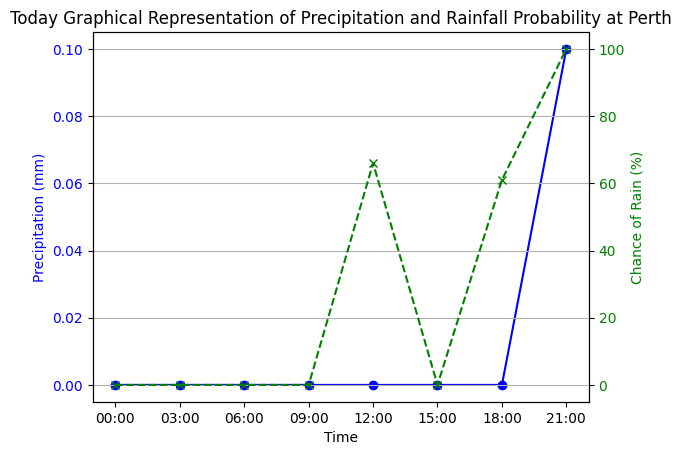

🤖 Hello! Zizi, Welcome to Weather Wise. How can I help you at Perth?
-----------------------------------------------------
Please enter your choice (1 - 5):
1. Check Current Weather & View Weather Forecast at Perth
2. Check Current Weather Hourly at Perth
3. Activities Suggestions & Weather Prediction assistant at Perth
4. Check Other Location
5. Exit Program


In [ ]:
# Tie everything together here
if __name__ == "__main__":
    title = "Weather Wise"
    blue_bold = "\033[1;94m"  # 1 for bold, 94 for light blue
    color = "\033[0m"

    print("=" * 53)
    print("" + blue_bold + title.center(51) + color + "")
    print("=" * 53)

    main()

## 🧪 Testing and Examples

In [ ]:
# Include sample input/output for each function

## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.